## Escolha dos 20 ativos e justificativa


 Os ativos foram recomendados por especialistas financeiros ou analistas de mercado, indicando que eles podem ter perspectivas positivas para o mês de setembro de 2023:
'BBAS3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA','CIEL3.SA','CMIG3.SA','CMIG4.SA','RDOR3.SA','CPFE3.SA','GGBR3.SA','GGBR4.SA','ITUB3.SA',
'ITUB4.SA','NEOE3.SA','PETR3.SA','PETR4.SA','VALE3.SA','RAIZ4.SA','MRFG3.SA', 'MOVI3.SA'

## Justificativa (linguagem e possibilidades), leitura dos dados.

Aliguagem escoluida foi o <b> Python</b> é altamente flexível e pode ser usado para uma variedade de tarefas relacionadas à análise financeira, desde a criação de modelos de previsão até a criação de visualizações interativas. Além de possuir um vasto ecossistema de bibliotecas de análise de dados, incluindo Pandas, NumPy, Matplotlib, e Seaborn, que facilitam a manipulação, visualização e análise de dados financeiros.

A biblioteca <b>yfinance</b> fornece uma maneira simples e eficaz de acessar dados financeiros diretamente da API do Yahoo Finance. Ela permite baixar facilmente dados históricos de preços de ações, informações sobre empresas, dados financeiros e muito mais.Além de ser gratuita

## Técnica:
A técina escolhida foi :algoritmo de clustering K-Means para este caso  pois aprensenta :
Facilidade de Implementação: O algoritmo K-Means é relativamente simples de entender e implementar, tornando-o adequado para uma ampla variedade de aplicações.

Eficiência Computacional: O K-Means é computacionalmente eficiente, o que significa que é capaz de lidar com grandes conjuntos de dados de forma razoável. Isso o torna uma escolha adequada para análise de grandes volumes de dados financeiros. 

Método do Cotovelo: O método do cotovelo (Elbow Method) é uma técnica que ajuda a determinar o número ideal de clusters. Isso é importante porque permite encontrar uma estrutura significativa nos dados, evitando sub ou supersegmentação.

## Leitura “dinâmica” em código ou API da Base de dados 

A leitura dinâmica foi feita usando a bibliotéca O yfinanc , pois apresenta dos seguintes pontos:

Fácil Acesso a Dados Financeiros: e fornece uma maneira simples e direta de acessar uma ampla gama de dados financeiros diretamente da API do Yahoo Finance. Isso inclui preços de ações históricos, informações financeiras das empresas, indicadores técnicos, dados econômicos e muito mais.

Ampla Disponibilidade de Dados: O Yahoo Finance é uma fonte amplamente reconhecida e confiável de dados financeiros. O yfinance permite aos usuários acessar esses dados sem a necessidade de pagar por serviços caros de provedores de dados financeiros.

Facilidade de Uso: A biblioteca é fácil de instalar e usar, o que a torna adequada para uma ampla gama de usuários, desde iniciantes até profissionais experientes em finanças e análise de dados.

Integração com Pandas: O yfinance é projetado para funcionar bem com o Pandas, uma das bibliotecas mais populares para análise de dados em Python. Isso facilita a manipulação e análise dos dados financeiros coletados.

Dados Atualizados Regularmente: A biblioteca permite que os usuários obtenham dados atualizados regularmente, o que é essencial para análises em tempo real ou análises históricas precisas.(basta aplicar : data_atual = dt.datetime.today().strftime('%Y-%m-%d'))

# implementação :

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import datetime as dt
import yfinance as yf

# Obter a data de hoje
data_atual = dt.datetime.today().strftime('%Y-%m-%d')

# Definir a lista de tickers
tickers = ['BBAS3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA','CIEL3.SA','CMIG3.SA','CMIG4.SA','RDOR3.SA','CPFE3.SA','GGBR3.SA','GGBR4.SA','ITUB3.SA',
           'ITUB4.SA','NEOE3.SA','PETR3.SA','PETR4.SA','VALE3.SA','RAIZ4.SA','MRFG3.SA', 'MOVI3.SA']

# Baixar os dados históricos até a data atual
data = yf.download(tickers, start="2023-01-01", end=data_atual)['Adj Close']

# Remover ativos duplicados
data = data.loc[:, ~data.columns.duplicated()]

# Continuar com o restante do seu código para calcular os retornos e encontrar os tickers com maior retorno acumulado.

[*********************100%%**********************]  20 of 20 completed


In [4]:
#verificar se a data é a atual
print(data_atual )

2023-09-30


Este bloco de código baixa os dados históricos de preços de fechamento ajustados para um conjunto de ações especificadas, em seguida, calcula a matriz de correlação para analisar como esses preços estão correlacionados entre si. Essa análise pode ser útil para entender as relações entre diferentes ativos financeiros em um portfólio.

<b>Método utilizado</b>: Cluster

C:\Users\Carlos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


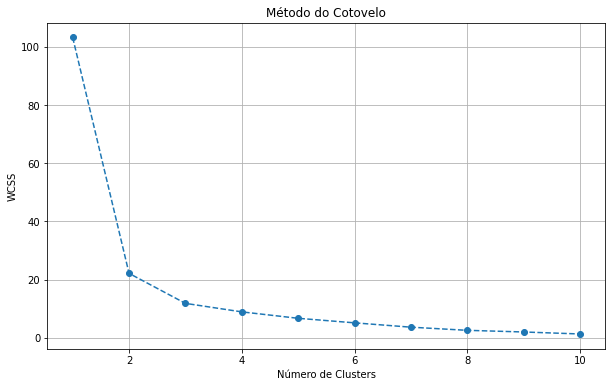

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Calcular a matriz de correlação:
matriz_correl = data.corr()
# calcular WCSS para diferentes números de clusters
wcss = [] # armazenar uma lista para alocar as distâncias
for i in range(1, 11): # o 11 foi forçado, mas pode mudar.. np-completo... lembre-se
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(matriz_correl)  # Usamos diretamente a matriz de correlação aqui
    wcss.append(kmeans.inertia_) ## resultados do inertia

# Plotar WCSS em relação ao número de clusters
# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)

plt.show()


NEste bloco  código utilizamos a biblioteca scikit-learn e matplotlib para realizar o seguinte:


Calcula a soma dos quadrados intra-cluster (WCSS) para diferentes números de clusters (de 1 a 10) usando o algoritmo K-Means.

Plota um gráfico do Método do Cotovelo que mostra o WCSS em relação ao número de clusters testados.

O Método do Cotovelo ajuda a determinar o número ideal de clusters para um conjunto de dados ao encontrar o ponto onde a curva do WCSS começa a se achatar, indicando um número adequado de clusters para o agrupamento.

Escolheremos 5 clusters para incluir na carteira os ativos com melhor performance dentro cada um dos 5 clusters.

      Ticker  Cluster
0   BBAS3.SA        0
1   BBDC4.SA        0
17  RAIZ4.SA        0
16  PETR4.SA        0
15  PETR3.SA        0
5   CMIG3.SA        0
6   CMIG4.SA        0
7   CPFE3.SA        0
14  NEOE3.SA        0
12  MOVI3.SA        0
10  ITUB3.SA        0
11  ITUB4.SA        0
19  VALE3.SA        1
3   BEEF3.SA        1
13  MRFG3.SA        2
9   GGBR4.SA        2
4   CIEL3.SA        3
2   BBSE3.SA        3
8   GGBR3.SA        4
18  RDOR3.SA        4


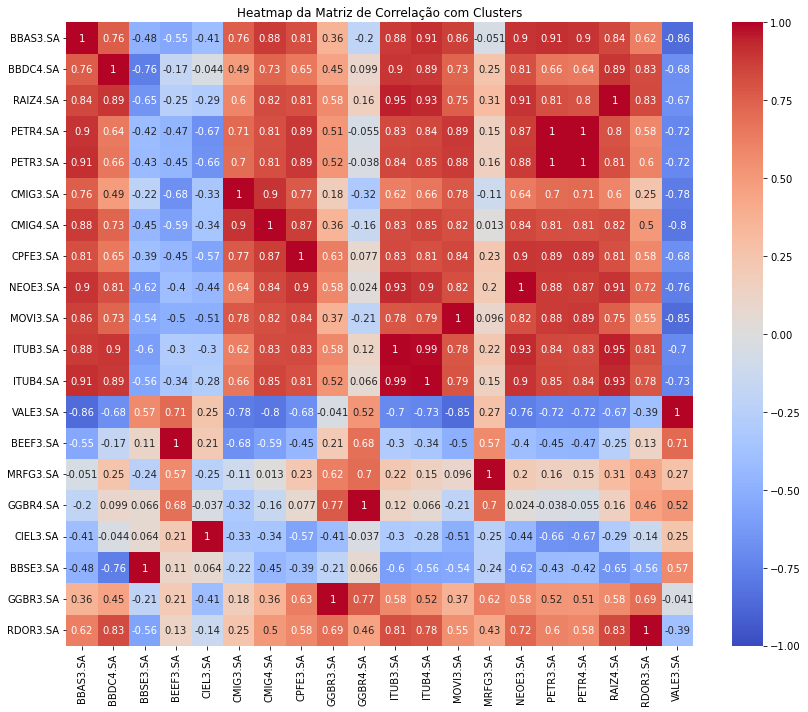

In [6]:
import pandas as pd
import seaborn as sns 
num_clusters = 5 

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters)   # rodar a função para o número de cluster definido
nomes = kmeans.fit_predict(matriz_correl)  # alocar os tickers pela correlação


matriz_correl_clustered = matriz_correl.copy() # copiar a matriz de correlação para não estragar a principal
matriz_correl_clustered['Cluster'] = nomes # adicionar nomes como uma nova coluna
matriz_correl_clustered = matriz_correl_clustered.sort_values('Cluster') # ordenar as linhas com base nos clusters

# criar um dasta_frame com os cluster
df_clusters = pd.DataFrame({
    'Ticker': matriz_correl.index,
    'Cluster': nomes
})

# ordenar
df_clusters = df_clusters.sort_values(by='Cluster')
print(df_clusters)


plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correl_clustered.drop('Cluster', axis=1), annot=True, cmap='coolwarm', vmin=-1, vmax=1, yticklabels=matriz_correl_clustered.index)
plt.title('Heatmap da Matriz de Correlação com Clusters')
plt.tight_layout()
plt.show()

esse código aplica o algoritmo K-Means para agrupar ativos financeiros com base em suas correlações, cria um DataFrame que associa ativos a seus clusters e gera um heatmap para visualizar as relações entre ativos em diferentes clusters. Isso pode ser útil para analisar a estrutura de correlação entre diferentes ativos em um portfólio financeiro.

Serão selecionados os ativos com maior retorno acumulado de cada cluster

In [7]:
# Definir o número de clusters
num_clusters = 5

# Calcular os clusters KMeans
kmeans = KMeans(n_clusters=num_clusters)
nomes = kmeans.fit_predict(matriz_correl)

# Definir unique_clusters após o cálculo dos clusters
unique_clusters = df_clusters['Cluster'].unique()

# Calcular os retornos diários
retorno = data.pct_change().dropna()

# Juntar os tickers com o retorno acumulado
df_combinado = pd.concat([df_clusters.set_index('Ticker')], axis=1)

# Certificar-se de que não haja valores duplicados em 'Cluster'
df_combinado = df_combinado.drop_duplicates(subset='Cluster')

# Calcular os retornos acumulados apenas para os ativos nos clusters selecionados
retorno_acumulado = (1 + retorno).cumprod()

# Guardar apenas o último valor do retorno acumulado
final_retorno_acumulado = retorno_acumulado.iloc[-1]

# Adicionar os retornos acumulados aos resultados combinados
df_combinado['Retorno Acumulado'] = final_retorno_acumulado

# Imprimir os tickers com maior retorno acumulado de cada cluster
print(" os 5 ativos com maior retorno acumulado de cada cluster:")
for cluster in unique_clusters:
    ticker = df_combinado[df_combinado['Cluster'] == cluster]['Retorno Acumulado'].idxmax()
    print(ticker)


 os 5 ativos com maior retorno acumulado de cada cluster:
BBAS3.SA
VALE3.SA
MRFG3.SA
CIEL3.SA
GGBR3.SA


Nesta secção, calculamos os retornos diários e os retornos acumulados a partir dos dados históricos de preços, depois identifica os ativos com o <b> maior retorno acumulado em cada cluster</b>. Esses ativos são impressos na saída, mostrando quais ativos tiveram o melhor desempenho em cada grupo de acordo com a análise de retorno acumulado.

In [8]:
df_combinado

,Cluster,Retorno Acumulado
Ticker,,
BBAS3.SA,0,1.524322
VALE3.SA,1,0.795836
MRFG3.SA,2,0.852871
CIEL3.SA,3,0.747262
GGBR3.SA,4,0.996542
